In [1]:
suppressMessages(library(tidyverse))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



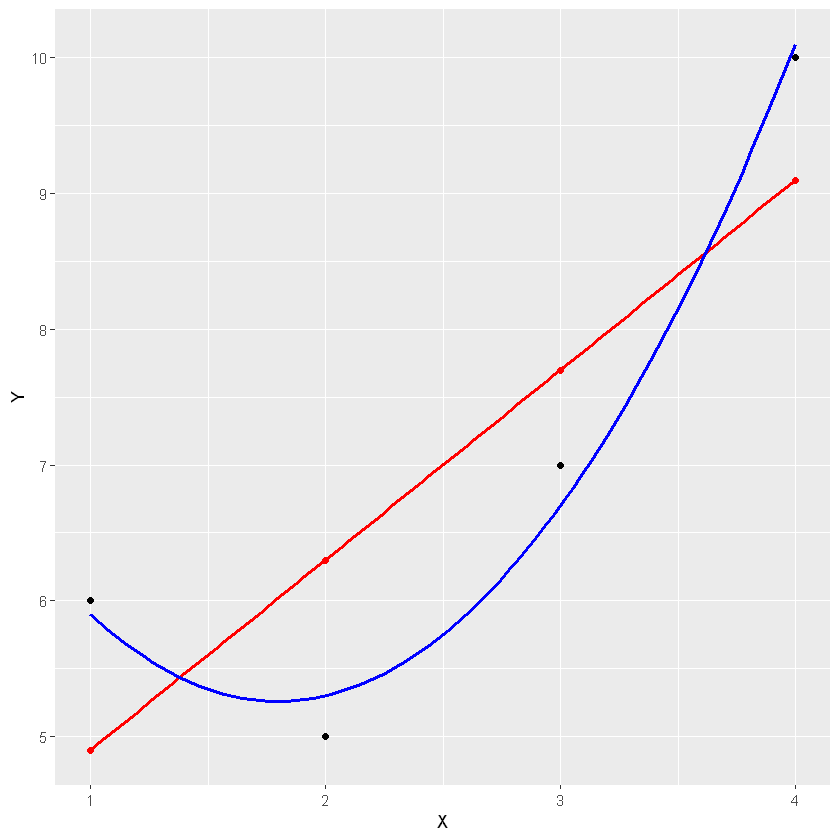

In [2]:
mydata <- read.csv(file="Ex1LS.csv", header=TRUE, sep=",")

model <- lm( formula = Y ~ X, mydata)
modelQ <- lm( formula = Y ~ X + I(X^2), mydata)

modData <- mydata
modData$newYQ <- predict(modelQ, mydata)

modData$newY <- predict(model, mydata)

p <- ggplot(modData, aes(x=X, y=Y))+geom_point()  
p <- p + geom_point(data = modData, aes(x=X, y = newY), color = 'red')
p <- p + geom_smooth(data=modData, aes(X, newY), se=FALSE, color = "red", span = 1.5)
p <- p + geom_smooth(data=modData, aes(X, newYQ), se=FALSE, color = "blue", span = 1.5)
p


`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



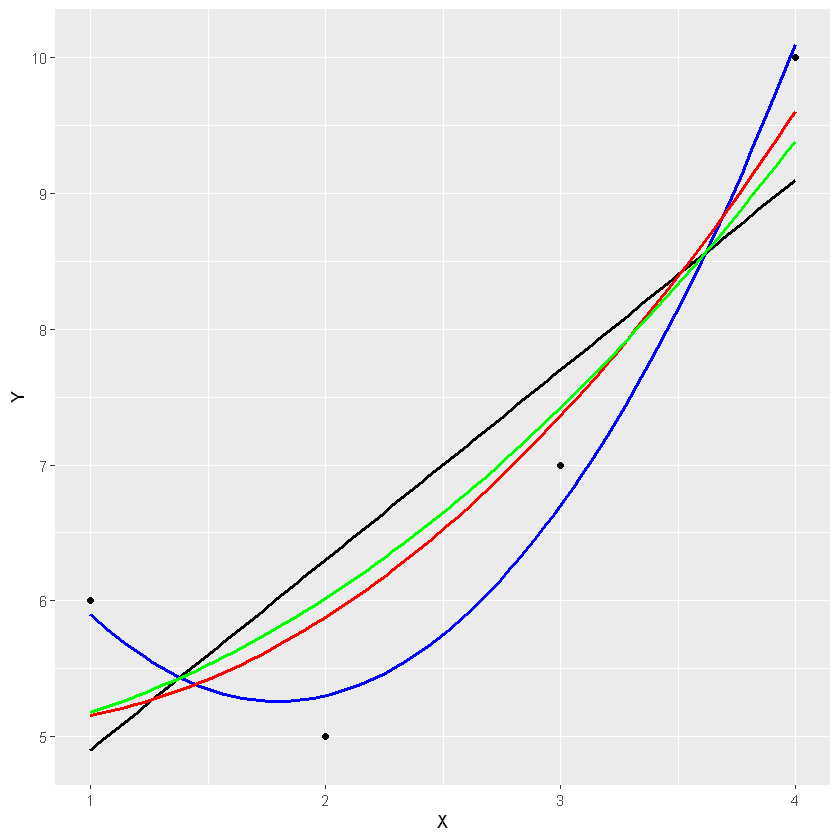

In [6]:
x <- mydata$X
y <- mydata$Y
d <- data.frame(x=x,y=y)

# using the quad function above for linear equation 
# and solving using normal equations (go back to regression 1)


m = length(mydata$X) 
x = matrix(c(rep(1,m), mydata$X, mydata$X^2), ncol=3)
n = ncol(x)
y = matrix(mydata$Y, ncol=1)


# set up 3 different levels of regularization term values 0, 1 and 10


lambda = c(0,1,10)
d = diag(1,n,n)
d[1,1] = 0
th = array(0,c(n,length(lambda)))

for (i in 1:length(lambda)) {
  th[,i] = solve(t(x) %*% x + (lambda[i] * d)) %*% (t(x) %*% y)
}

nwx = seq(1, 4, len=50)

x = matrix(c(rep(1,length(nwx)), nwx, nwx^2), ncol=3)
newData <- as.data.frame(nwx)
newData$th1 <- (x %*% th[,1])
newData$th2 <- (x %*% th[,2])
newData$th3 <- (x %*% th[,3])

X <- newData$nwx
#newData$lm <- predict(model, newData = X)

p <- ggplot(mydata, aes(x=X, y=Y))+geom_point() + geom_smooth(method = 'lm', se=FALSE, color = 'black') 
p <- p+ geom_smooth(data = newData, aes(x=nwx, y = th1), color = 'blue')
p <- p+ geom_smooth(data = newData, aes(x=nwx, y = th2), color = 'red')
p <- p+ geom_smooth(data = newData, aes(x=nwx, y = th3), color = 'green')
p
